In [55]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from sklearn.impute import SimpleImputer
import io 

What is a hrsa grant
what is the cretiria for awarding
Querry regions with most grants and compare it to quality of care/poverty levels
Compare areas in SD with minorities and how they rank in country
Discuss findings
Discuss causes for low granting---lack of knowledge a huge contributing factor, what else....

In [56]:
df = pd.read_excel(r'C:\Github\Fullstack-Data-Analyst\data_projects\Hrsa_Awards\grant_data.xlsx')

In [57]:
df.columns = df.columns.str.replace(' ', '')

In [58]:
df

,AwardYear,GranteeName,GranteeAddress,GranteeCity,GranteeStateAbbreviation,GranteeZIPCode,GrantActivityCode,GrantNumber,GrantSerialNumber,ProjectPeriodStartDate,...,NameofU.S.SenatorNumberOne,NameofU.S.SenatorNumberTwo,DataWarehouseRecordCreateDate,Abstract,GrantProgramDescription,GranteeTypeDescription,DUNSNumber,UniqueEntityIdentifier,GeocodingArtifactAddressPrimaryXCoordinate,GeocodingArtifactAddressPrimaryYCoordinate
0,2021,"UNIVERSIDAD INTERAMERICANA DE PUERTO RICO, INC.",Carr 2,Hato Abajo,PR,612,A22,A22HP30974,30974,2017-07-01,...,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,NaN,"Corporate Entity, Federal Tax Exempt",132952169.0,TJURX4A9KDC5,-66.755430,18.476911
1,2020,"UNIVERSIDAD INTERAMERICANA DE PUERTO RICO, INC.",Carr 2,Hato Abajo,PR,612,A22,A22HP30974,30974,2017-07-01,...,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,NaN,"Corporate Entity, Federal Tax Exempt",132952169.0,TJURX4A9KDC5,-66.755430,18.476911
2,2022,"UNIVERSIDAD INTERAMERICANA DE PUERTO RICO, INC.",Carr 2,Hato Abajo,PR,612,A22,A22HP30974,30974,2017-07-01,...,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,NaN,"Corporate Entity, Federal Tax Exempt",132952169.0,TJURX4A9KDC5,-66.755430,18.476911
3,2021,"Hospital General De Castaner, Inc.",64.2 Carr 135,Bartolo,PR,631,C8E,C8ECS43723,43723,2021-09-15,...,Not Determined,Not Determined,2022-07-13,No Link,NaN,"Corporate Entity, Federal Tax Exempt",91024620.0,Q4JCC4UYFY83,-66.832675,18.179521
4,2021,"Hospital General De Castaner, Inc.",64.2 Carr 135,Bartolo,PR,631,H80,H80CS00354,354,2002-04-01,...,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,NaN,"Corporate Entity, Federal Tax Exempt",91024620.0,Q4JCC4UYFY83,-66.832675,18.179521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22210,2021,Southeast Alaska Regional Health Consortium,3100 Channel Dr STE 300,Juneau,AK,99801-7837,C8E,C8ECS44038,44038,2021-09-15,...,Lisa Murkowski,Dan Sullivan,2022-07-13,No Link,NaN,"Corporate Entity, Federal Tax Exempt",83727826.0,F3NBRWQM8M69,-134.467023,58.327031
22211,2021,Southeast Alaska Regional Health Consortium,3100 Channel Dr STE 300,Juneau,AK,99801-7837,H8F,H8FCS41163,41163,2021-04-01,...,Lisa Murkowski,Dan Sullivan,2022-07-13,No Link,NaN,"Corporate Entity, Federal Tax Exempt",83727826.0,F3NBRWQM8M69,-134.467023,58.327031
22212,2022,Southeast Alaska Regional Health Consortium,3100 Channel Dr STE 300,Juneau,AK,99801-7837,H80,H80CS00559,559,2002-07-01,...,Lisa Murkowski,Dan Sullivan,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,NaN,"Corporate Entity, Federal Tax Exempt",83727826.0,F3NBRWQM8M69,-134.467023,58.327031
22213,2021,NETWORK OF HIV POSITIVES IN SIERRA LEONE,261 Regent RD Grafton,"Freetown, Sierra Leone",NaN,NaN,UL1,UL1OA45192,45192,2021-09-30,...,Not Determined,Not Determined,2022-07-13,No Link,NaN,International Organization,851772383.0,KCHVD2RW5NU6,NaN,NaN


Combine state and city, change zip code from three digits to five, take out the extension of zip codes. Delete unwanted columns

In [59]:
df['City&State'] = df['GranteeCity'] + ',' + df['GranteeStateAbbreviation']

Change the position of city and State

In [60]:
city = df['City&State']
df = df.drop(columns=['City&State'])
df.insert(loc=5, column='City&State', value=city)

First fill Zip Codes with '0'
Second, replace the 00nan zipcodes with '00000'
Third - Break Apart zip code & drop the old and new ext zip codes

In [61]:
df['GranteeZIPCode'] = df['GranteeZIPCode'].astype(str).str.pad(5, side='left', fillchar='0')

In [62]:
df['GranteeZIPCode'] = df['GranteeZIPCode'].str.replace('00nan', '00000')

In [63]:
# df[['ZipCodeGrantee', 'ZipCodeExtGrantee']] = df.GranteeZIPCode.str.split('-', expand=True)

In [64]:
df[['ZipCode', 'ZipCodeExt']] = df.GranteeZIPCode.str.split(pat='-', n=1, expand=True)

In [65]:
df.drop(columns=['ZipCodeExt', 'GranteeZIPCode'], inplace=True)

Rename wanted zip code then move it next to city & state

In [66]:
df.rename(columns={'ZipCode': 'GranteeZipCode'}, inplace=True)

In [67]:
zip = df['GranteeZipCode']
df =df.drop(columns=['GranteeZipCode'])
df.insert(loc=6, column='GranteeZipCode', value=zip)

Change GrantProjectPeriodEndDate from object to date

In [68]:
df['GrantProjectPeriodEndDate'] = pd.to_datetime(df['GrantProjectPeriodEndDate'], errors='coerce')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22215 entries, 0 to 22214
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   AwardYear                                   22215 non-null  int64         
 1   GranteeName                                 22215 non-null  object        
 2   GranteeAddress                              22215 non-null  object        
 3   GranteeCity                                 22215 non-null  object        
 4   GranteeStateAbbreviation                    22151 non-null  object        
 5   City&State                                  22151 non-null  object        
 6   GranteeZipCode                              22215 non-null  object        
 7   GrantActivityCode                           22215 non-null  object        
 8   GrantNumber                                 22215 non-null  object        
 9   GrantS

In [70]:
df

,AwardYear,GranteeName,GranteeAddress,GranteeCity,GranteeStateAbbreviation,City&State,GranteeZipCode,GrantActivityCode,GrantNumber,GrantSerialNumber,...,NameofU.S.SenatorNumberOne,NameofU.S.SenatorNumberTwo,DataWarehouseRecordCreateDate,Abstract,GrantProgramDescription,GranteeTypeDescription,DUNSNumber,UniqueEntityIdentifier,GeocodingArtifactAddressPrimaryXCoordinate,GeocodingArtifactAddressPrimaryYCoordinate
0,2021,"UNIVERSIDAD INTERAMERICANA DE PUERTO RICO, INC.",Carr 2,Hato Abajo,PR,"Hato Abajo,PR",00612,A22,A22HP30974,30974,...,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,NaN,"Corporate Entity, Federal Tax Exempt",132952169.0,TJURX4A9KDC5,-66.755430,18.476911
1,2020,"UNIVERSIDAD INTERAMERICANA DE PUERTO RICO, INC.",Carr 2,Hato Abajo,PR,"Hato Abajo,PR",00612,A22,A22HP30974,30974,...,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,NaN,"Corporate Entity, Federal Tax Exempt",132952169.0,TJURX4A9KDC5,-66.755430,18.476911
2,2022,"UNIVERSIDAD INTERAMERICANA DE PUERTO RICO, INC.",Carr 2,Hato Abajo,PR,"Hato Abajo,PR",00612,A22,A22HP30974,30974,...,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,NaN,"Corporate Entity, Federal Tax Exempt",132952169.0,TJURX4A9KDC5,-66.755430,18.476911
3,2021,"Hospital General De Castaner, Inc.",64.2 Carr 135,Bartolo,PR,"Bartolo,PR",00631,C8E,C8ECS43723,43723,...,Not Determined,Not Determined,2022-07-13,No Link,NaN,"Corporate Entity, Federal Tax Exempt",91024620.0,Q4JCC4UYFY83,-66.832675,18.179521
4,2021,"Hospital General De Castaner, Inc.",64.2 Carr 135,Bartolo,PR,"Bartolo,PR",00631,H80,H80CS00354,354,...,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,NaN,"Corporate Entity, Federal Tax Exempt",91024620.0,Q4JCC4UYFY83,-66.832675,18.179521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22210,2021,Southeast Alaska Regional Health Consortium,3100 Channel Dr STE 300,Juneau,AK,"Juneau,AK",99801,C8E,C8ECS44038,44038,...,Lisa Murkowski,Dan Sullivan,2022-07-13,No Link,NaN,"Corporate Entity, Federal Tax Exempt",83727826.0,F3NBRWQM8M69,-134.467023,58.327031
22211,2021,Southeast Alaska Regional Health Consortium,3100 Channel Dr STE 300,Juneau,AK,"Juneau,AK",99801,H8F,H8FCS41163,41163,...,Lisa Murkowski,Dan Sullivan,2022-07-13,No Link,NaN,"Corporate Entity, Federal Tax Exempt",83727826.0,F3NBRWQM8M69,-134.467023,58.327031
22212,2022,Southeast Alaska Regional Health Consortium,3100 Channel Dr STE 300,Juneau,AK,"Juneau,AK",99801,H80,H80CS00559,559,...,Lisa Murkowski,Dan Sullivan,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,NaN,"Corporate Entity, Federal Tax Exempt",83727826.0,F3NBRWQM8M69,-134.467023,58.327031
22213,2021,NETWORK OF HIV POSITIVES IN SIERRA LEONE,261 Regent RD Grafton,"Freetown, Sierra Leone",NaN,NaN,00000,UL1,UL1OA45192,45192,...,Not Determined,Not Determined,2022-07-13,No Link,NaN,International Organization,851772383.0,KCHVD2RW5NU6,NaN,NaN


Finding columns that contain unique or specific values

rows_with_dash = df['column_name].str.contains('-).fillna(False)
len(df(rows_with_dashes))

Find missing values by percentage

In [71]:
mis_col = df.isna().sum() * 100 / len(df)
mis_col.sort_values(ascending=False)

GrantProgramDescription                       100.000000
UniformDataSystemGrantProgramDescription       59.909971
GeocodingArtifactAddressPrimaryYCoordinate      0.292595
GeocodingArtifactAddressPrimaryXCoordinate      0.292595
U.S.-MexicoBorderCountyIndicator                0.292595
GranteeStateAbbreviation                        0.288094
City&State                                      0.288094
GrantProgramDirectorPhoneNumber                 0.085528
DUNSNumber                                      0.027009
GrantProgramDirectorE-mail                      0.018006
GrantProjectPeriodEndDate                       0.009003
ProjectPeriodStartDate                          0.000000
GrantActivityCode                               0.000000
GranteeAddress                                  0.000000
UniqueEntityIdentifier                          0.000000
GranteeCity                                     0.000000
GranteeTypeDescription                          0.000000
GranteeZipCode                 

Drop Missing Values with over 6%

In [72]:
df.drop(columns=['GrantProgramDescription', 'UniformDataSystemGrantProgramDescription'], inplace=True)

In [73]:
df

,AwardYear,GranteeName,GranteeAddress,GranteeCity,GranteeStateAbbreviation,City&State,GranteeZipCode,GrantActivityCode,GrantNumber,GrantSerialNumber,...,U.S.-MexicoBorderCountyIndicator,NameofU.S.SenatorNumberOne,NameofU.S.SenatorNumberTwo,DataWarehouseRecordCreateDate,Abstract,GranteeTypeDescription,DUNSNumber,UniqueEntityIdentifier,GeocodingArtifactAddressPrimaryXCoordinate,GeocodingArtifactAddressPrimaryYCoordinate
0,2021,"UNIVERSIDAD INTERAMERICANA DE PUERTO RICO, INC.",Carr 2,Hato Abajo,PR,"Hato Abajo,PR",00612,A22,A22HP30974,30974,...,N,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,"Corporate Entity, Federal Tax Exempt",132952169.0,TJURX4A9KDC5,-66.755430,18.476911
1,2020,"UNIVERSIDAD INTERAMERICANA DE PUERTO RICO, INC.",Carr 2,Hato Abajo,PR,"Hato Abajo,PR",00612,A22,A22HP30974,30974,...,N,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,"Corporate Entity, Federal Tax Exempt",132952169.0,TJURX4A9KDC5,-66.755430,18.476911
2,2022,"UNIVERSIDAD INTERAMERICANA DE PUERTO RICO, INC.",Carr 2,Hato Abajo,PR,"Hato Abajo,PR",00612,A22,A22HP30974,30974,...,N,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,"Corporate Entity, Federal Tax Exempt",132952169.0,TJURX4A9KDC5,-66.755430,18.476911
3,2021,"Hospital General De Castaner, Inc.",64.2 Carr 135,Bartolo,PR,"Bartolo,PR",00631,C8E,C8ECS43723,43723,...,N,Not Determined,Not Determined,2022-07-13,No Link,"Corporate Entity, Federal Tax Exempt",91024620.0,Q4JCC4UYFY83,-66.832675,18.179521
4,2021,"Hospital General De Castaner, Inc.",64.2 Carr 135,Bartolo,PR,"Bartolo,PR",00631,H80,H80CS00354,354,...,N,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,"Corporate Entity, Federal Tax Exempt",91024620.0,Q4JCC4UYFY83,-66.832675,18.179521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22210,2021,Southeast Alaska Regional Health Consortium,3100 Channel Dr STE 300,Juneau,AK,"Juneau,AK",99801,C8E,C8ECS44038,44038,...,N,Lisa Murkowski,Dan Sullivan,2022-07-13,No Link,"Corporate Entity, Federal Tax Exempt",83727826.0,F3NBRWQM8M69,-134.467023,58.327031
22211,2021,Southeast Alaska Regional Health Consortium,3100 Channel Dr STE 300,Juneau,AK,"Juneau,AK",99801,H8F,H8FCS41163,41163,...,N,Lisa Murkowski,Dan Sullivan,2022-07-13,No Link,"Corporate Entity, Federal Tax Exempt",83727826.0,F3NBRWQM8M69,-134.467023,58.327031
22212,2022,Southeast Alaska Regional Health Consortium,3100 Channel Dr STE 300,Juneau,AK,"Juneau,AK",99801,H80,H80CS00559,559,...,N,Lisa Murkowski,Dan Sullivan,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,"Corporate Entity, Federal Tax Exempt",83727826.0,F3NBRWQM8M69,-134.467023,58.327031
22213,2021,NETWORK OF HIV POSITIVES IN SIERRA LEONE,261 Regent RD Grafton,"Freetown, Sierra Leone",NaN,NaN,00000,UL1,UL1OA45192,45192,...,NaN,Not Determined,Not Determined,2022-07-13,No Link,International Organization,851772383.0,KCHVD2RW5NU6,NaN,NaN


Our Data has no duplicates nor ..., not going to impute the data due to uniqueness

Run a distribution to show need for filling

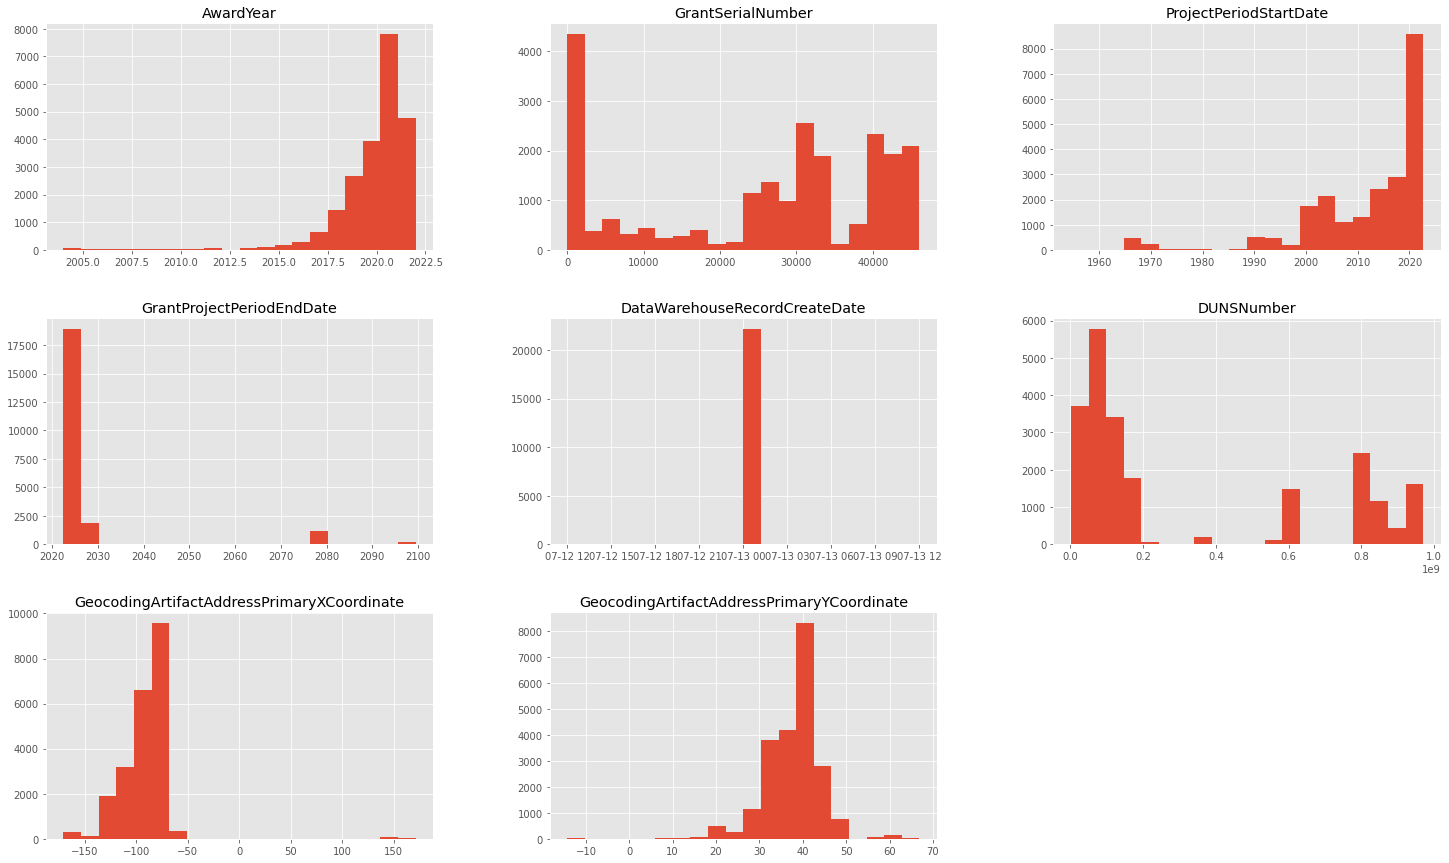

In [74]:
hist_dist = df.hist(bins=20, figsize=(25,15))

I will not be imputing the data however, I would have used median for AwardYear, StartDate and Xcordinates because they are skewed. The rest would be mean because of normal distribution for createDate Warehouse and then the rest use mode. However each column has a unique value and thus I won't impute

With machine learning, categorical data can be encorded to allow analysis.
The process is as follows

In [75]:
import sklearn

from sklearn.preprocessing import LabelEncoder  ##Switches cat data to numerical
from sklearn.preprocessing import StandardScaler  ## standadizes data

In [76]:
le=LabelEncoder()
#le.fit(df.column_name.drop_duplicates())
df ['GranteeZipCode_N']= le.fit_transform(df['GranteeZipCode'])

In [77]:
df.head()

,AwardYear,GranteeName,GranteeAddress,GranteeCity,GranteeStateAbbreviation,City&State,GranteeZipCode,GrantActivityCode,GrantNumber,GrantSerialNumber,...,NameofU.S.SenatorNumberOne,NameofU.S.SenatorNumberTwo,DataWarehouseRecordCreateDate,Abstract,GranteeTypeDescription,DUNSNumber,UniqueEntityIdentifier,GeocodingArtifactAddressPrimaryXCoordinate,GeocodingArtifactAddressPrimaryYCoordinate,GranteeZipCode_N
0,2021,"UNIVERSIDAD INTERAMERICANA DE PUERTO RICO, INC.",Carr 2,Hato Abajo,PR,"Hato Abajo,PR",00612,A22,A22HP30974,30974,...,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,"Corporate Entity, Federal Tax Exempt",132952169.0,TJURX4A9KDC5,-66.755430,18.476911,1
1,2020,"UNIVERSIDAD INTERAMERICANA DE PUERTO RICO, INC.",Carr 2,Hato Abajo,PR,"Hato Abajo,PR",00612,A22,A22HP30974,30974,...,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,"Corporate Entity, Federal Tax Exempt",132952169.0,TJURX4A9KDC5,-66.755430,18.476911,1
2,2022,"UNIVERSIDAD INTERAMERICANA DE PUERTO RICO, INC.",Carr 2,Hato Abajo,PR,"Hato Abajo,PR",00612,A22,A22HP30974,30974,...,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,"Corporate Entity, Federal Tax Exempt",132952169.0,TJURX4A9KDC5,-66.755430,18.476911,1
3,2021,"Hospital General De Castaner, Inc.",64.2 Carr 135,Bartolo,PR,"Bartolo,PR",00631,C8E,C8ECS43723,43723,...,Not Determined,Not Determined,2022-07-13,No Link,"Corporate Entity, Federal Tax Exempt",91024620.0,Q4JCC4UYFY83,-66.832675,18.179521,4
4,2021,"Hospital General De Castaner, Inc.",64.2 Carr 135,Bartolo,PR,"Bartolo,PR",00631,H80,H80CS00354,354,...,Not Determined,Not Determined,2022-07-13,https://grants.hrsa.gov/2010/web2External/Inte...,"Corporate Entity, Federal Tax Exempt",91024620.0,Q4JCC4UYFY83,-66.832675,18.179521,4


Looking at above, there is a new column named Zip___N, and its a numerical one

When dealing with Label encoder -- it assigns columns as numerical numbers i.e. 0,1,2,3 n -1 for NaN. -- 'a', 'b', 'c' will be 1,2,3
OneHotEncoder does however do the same but create new columns with each column being assigned a 1 and rest zero. As an example an initial column of 'a', 'b', 'c' will have 1, 0, 0 or 0,1, 0, or 0,0,1 respectively

If data is ordinal aka 'the older you get, the wiser you will be' then use OneHotEncoder for correlation however if its 'experience is better than age' then use LabelEncoder
==>> labelEcorder should not be used lets say countries are listed randomly and then trying to correlate the population (argentina... brazil...England..Kenya,,, population 1, 3, 0.9, 0.2)

In [78]:
df.corr()

,AwardYear,GrantSerialNumber,DUNSNumber,GeocodingArtifactAddressPrimaryXCoordinate,GeocodingArtifactAddressPrimaryYCoordinate,GranteeZipCode_N
AwardYear,1.000000,0.144345,0.027362,-0.028697,-0.024161,0.026680
GrantSerialNumber,0.144345,1.000000,-0.036133,0.005584,0.002580,0.005428
DUNSNumber,0.027362,-0.036133,1.000000,0.026273,-0.097709,0.067036
GeocodingArtifactAddressPrimaryXCoordinate,-0.028697,0.005584,0.026273,1.000000,-0.176875,-0.596666
GeocodingArtifactAddressPrimaryYCoordinate,-0.024161,0.002580,-0.097709,-0.176875,1.000000,-0.055368
GranteeZipCode_N,0.026680,0.005428,0.067036,-0.596666,-0.055368,1.000000


Isolate categorical features, encode em using proper method

In [79]:
num_df = df.select_dtypes(include=['float64', 'int64']).columns
cat_df = df.select_dtypes(exclude=['float64', 'int64']).columns

In [83]:
# california_hrsa = df[df['GranteeStateAbbreviation'].str.contains('CA')]

In [80]:
# df.to_excel('grant_analysis_hrsa.xlsx')

In [81]:
# df.to_csv('grant_analysis_hrsa_csv.csv')

define data prep for columns